- KEYWORDS: scipy.optimize.fsolve, scipy.misc.derivative, list comprehension


## Introduction to nonlinear algebra



In non-linear algebra, we seek solutions to the equation $f(x) = 0$ where $f(x)$ is *non-linear* in $x$. These are examples of non-linear algebraic equations:

-   $e^x=4$
-   $x^2 + x - 1 = 0$
-   $f(F_A) = F_{A0} - F_{A} - k F_A^2 / \nu / V = 0$

There is not a general theory for whether there is a solution, multiple solutions, or no solution to nonlinear algebraic equations. For example,

$sin(x) = 2$ has no solution. We define $f(x) = sin(x) - 2$ and plot it. You can see there no intersections with the x-axis at y=0, meaning no solutions.



# Out [57]:
# text/plain
Text(0, 0.5, 'y')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

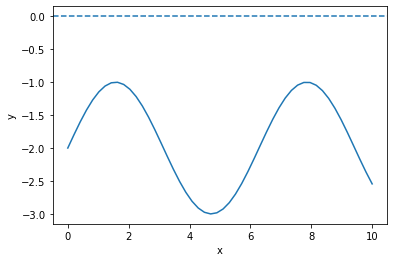

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10)

def f(x):
    return np.sin(x) - 2

plt.plot(x, f(x))
plt.axhline(0, ls='--')
plt.xlabel('x')
plt.ylabel('y')

In contrast, $sin(x) = 0.5$ will have an infinite number of solutions, everywhere the function intersects the x-axis.



# Out [58]:
# text/plain
Text(0, 0.5, 'y')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

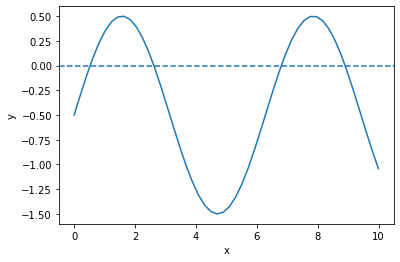

In [1]:
def f2(x):
    return np.sin(x) - 0.5

plt.plot(x, f2(x))
plt.axhline(0, ls='--')
plt.xlabel('x')
plt.ylabel('y')

Finally, $sin(x) = x - 1$ has only one solution.



# Out [59]:
# text/plain
Text(0, 0.5, 'y')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

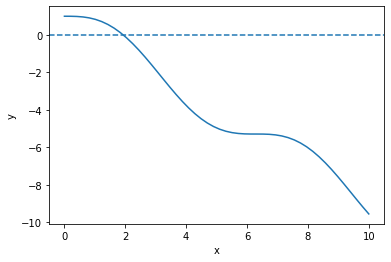

In [1]:
def f3(x):
    return np.sin(x) - (x - 1)

plt.plot(x, f3(x))
plt.axhline(0, ls='--')
plt.xlabel('x')
plt.ylabel('y')

The equation $e^{-0.5 x} \sin(x) = 0.5$, evidently has two solutions, but other versions of this equation might have 0, 1, multiple or infinite solutions.



# Out [60]:
# text/plain
Text(0, 0.5, 'objective')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

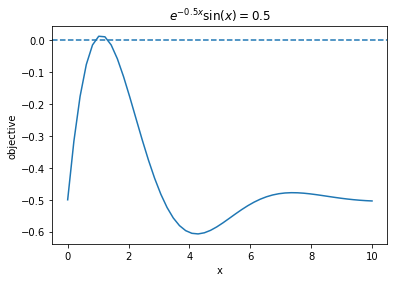

In [1]:
def f3(x):
    return np.exp(-0.5 * x) * np.sin(x) - 0.5

plt.plot(x, f3(x))
plt.axhline(0, ls='--')
plt.title('$e^{-0.5 x} \sin(x) = 0.5$')
plt.xlabel('x')
plt.ylabel('objective')

**exercise** modify the equation to see 0, 1, many or infinite solutions.

Graphical methods like this are invaluable to visually assess if there are any solutions, and if so how many solutions at least over some range of solutions. Sometimes, this is the fastest way to estimate a solution. Here we focus on nonlinear algebra problems that cannot be analytically solved. These kinds of problems require an iterative solution approach.



### Newton-Raphson method for finding solutions



Notes adapted from [https://en.wikipedia.org/wiki/Newton%27s_method](https://en.wikipedia.org/wiki/Newton%27s_method).

The key idea is that we start with a guess that is close to the solution, and then the function is approximated by a line tangent to the function to find where the line intersects the x-axis. For well-behaved functions, this is a better estimate of where the function equals zero than the first guess. Then, we repeat this until we get sufficiently close to zero.

So, we start with the point (x0, f(x0)), and we compute f'(x0), which is the slope of the line tangent to f(x0). We can express an equation for this line as: $y - f(x0) = f'(x0)(x - x0)$ If we now solve this for the $x$ where $y=0$ leads to:

$0 = f'(x0)(x - x0) + f(x0)$

which leads to

$x = x0 - f(x0) / f'(x0)$

To implement this, we need to decide what is the tolerance for defining 0, and what is the maximum number of iterations we want to consider?

We will first consider what is the square root of 612? This is equivalent to finding a solution to $x^2 = 612$

$f(x) = x^2 - 612$

Let's start with a guess of x=25, since we know $x^2=625$. We also know $f'(x) = 2x$.

The approach is iterative, so we will specify the maximum number of steps to iterate to, and a criteria for stopping.



In [1]:
x0 = 25

Nmax = 25  # stop if we hit this many iterations
TOL = 1e-3 # stop if we are less than this number

def f(x):
    "The function to solve."
    return x**2 - 612

def fprime(x):
    "Derivative of the function to solve."
    return 2 * x

# Here is the iterative solution
for i in range(Nmax):
    xnew = x0 - f(x0) / fprime(x0)
    x0 = xnew

    print(f'{i}: {xnew}')
    if np.abs(f(xnew)) < TOL:
        break

    if i == Nmax - 1:
        print('Max iterations exceeded')
        break

print(xnew, xnew**2)

# Out [61]:
# output
0: 24.74
1: 24.738633791430882
24.738633791430882 612.0000018665258

That is pretty remarkable, it only took two iterations. That is partly because we started pretty close to the answer. Try this again with different initial guesses and see how the number of iterations changes. Also try with negative numbers. There are two solutions that are possible, and the one you get depends on the initial guess.

One reason it takes so few iterations here is that Newton's method converges quadratically when you are close to the solution, and in this simple case we have a quadratic function, so we get to the answer in just a few steps.



### Problem problems



There are pathological situations you can get into. Consider this simple looking polynomial:



# Out [62]:
# text/plain
Text(0, 0.5, 'f(x)')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

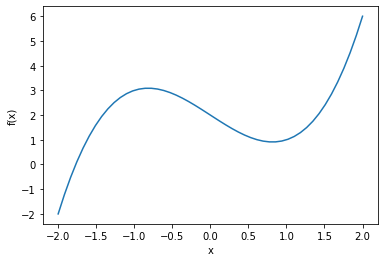

In [1]:
def f(x):
    return x**3 - 2 * x + 2

def fprime(x):
    return 3 * x**2 - 2

x = np.linspace(-2, 2)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')

It seems obvious there is a root near -1.7. But if you use a guess around x=0, the algorithm simply oscillates back and forth and never converges. Let's see:



In [1]:
x0 = 0

for i in range(Nmax):
    xnew = x0 - f(x0) / fprime(x0)
    x0 = xnew
    print(f'{i}: {xnew}')
    if np.abs(f(xnew)) < TOL:
        break

    if i == Nmax - 1:
        print('Max iterations exceeded')
        break

print(xnew)

# Out [63]:
# output
0: 1.0
1: 0.0
2: 1.0
3: 0.0
4: 1.0
5: 0.0
6: 1.0
7: 0.0
8: 1.0
9: 0.0
10: 1.0
11: 0.0
12: 1.0
13: 0.0
14: 1.0
15: 0.0
16: 1.0
17: 0.0
18: 1.0
19: 0.0
20: 1.0
21: 0.0
22: 1.0
23: 0.0
24: 1.0
Max iterations exceeded
1.0

**Exercise:** Try several initial guesses, and see which ones converge.

You can also run into problems when:

-   $f'(x) = 0$ at the initial guess, or a subsequent unpdate, then you get a singularity in the update.
-   The first derivative is discontinuous at the root. Then you may not converge because the update can bounce back and forth.
-   The first derivative is undefined at the root

We do not frequently run into these issues, but they do occur from time to time. The solution is usually to use a better initial guess.



## Derivatives of functions



When you can derive an analytical derivative, you should probably consider doing that, because otherwise we have to approximate the derivatives numerically using finite differences, which is less accurate and computationally more expensive, or we need to use advance libraries that are capable of finding derivatives automatically. We will first see how to the finite differences approach, and later learn about the automatic approach.

Let's examine the `scipy.misc.derivative` function. You provide a function, an x-value that you want the derivative at, and a dx to use in a finite-difference formula. By default, three points are used in the difference formula. You want to use a small dx to get an accurate result, but not too small or you can get numerical errors.

**exercise**: Try this out with different values of dx from 0.1 to 1e-15.



In [1]:
from scipy.misc import derivative

def f(x):
    return x**3

x0 = 12

derivative(f, x0, dx=1e-3), 3 * x0**2  # the numerical and analytical derivative

# Out [64]:
# text/plain
(432.0000009997784, 432)

It would be nice to have some adaptive code that just does the right thing to find a dx adaptively. Here is an example:



In [1]:
def fprime(func, x0, dx=0.1, tolerance=1e-6, nmax=10):
    """Estimate the derivative of func at x0. dx is the initial spacing to use, and
    it will be adaptively made smaller to get the derivative accurately with a
    tolerance. nmax is the maximum number of divisions to make.

    """
    d0 = derivative(func, x0, dx=dx)
    for i in range(nmax):
        dx = dx / 2
        dnew = derivative(func, x0, dx=dx)
        if np.abs(d0 - dnew) <= tolerance:
            return dnew
        else:
            d0 = dnew

    # You only get here when the loop has completed and not returned a value
    print('Maximum number of divisions reached')
    return None

# Out [65]:

And, here is our derivative function in action:



In [1]:
def f(x):
    return x**3

fprime(f, 12)

# Out [66]:
# text/plain
432.0000001520384

Let's wrap the Newton method in a function too, using our fprime function to get the derivative.



In [1]:
def newton(func, x0, tolerance=1e-6, nmax=10):
    for i in range(nmax):
        xnew = x0 - func(x0) / fprime(func, x0)
        x0 = xnew
        if np.abs(func(xnew)) < tolerance:
            return xnew

    print('Max iterations exceeded')
    return None

# Out [67]:

Now, we have a pretty convenient way to solve equations:



In [1]:
def f(x):
    return x**2 - 612

newton(f, 25), np.sqrt(612)

# Out [68]:
# text/plain
(24.738633753705965, 24.73863375370596)

This is the basic idea behind nonlinear algebra solvers. Similar to the ode solver we used, there are functions in scipy written to solve nonlinear equations. We consider these next.



## fsolve



`scipy.optimize.fsolve` is the main function we will use to solve nonlinear algebra problems. `fsolve` can be used with functions where you have the derivative, and where you don't.



In [1]:
from scipy.optimize import fsolve
?fsolve

# Out [69]:

Let's see the simplest example.

Solve $e^x = 2$.



In [1]:
import numpy as np

def objective(x):
    return np.exp(x) - 2  # equal to zero at the solution

fsolve(objective, 2), np.log(2)

# Out [70]:
# text/plain
(array([0.69314718]), 0.6931471805599453)

Note that the result is an array. We can *unpack* the array with this syntax. Note the comma. Why a comma? it indicates to Python that the results should be unpacked into the variable in a special way, i.e. the first value of the result goes into the first variable. That is all there is in this case.

This is the preferred way to get the value of the solution into x:



In [1]:
x, = fsolve(objective, 2)
x

# Out [71]:
# text/plain
0.6931471805599456

Here are two checks on the answer.



In [1]:
objective(x), x - np.log(2)

# Out [72]:
# text/plain
(4.440892098500626e-16, 3.3306690738754696e-16)

You can get a lot more information by setting full output to 1. Note you have to assign 4 variables to the output in this case. That status will be 1 if it succeeds.



In [1]:
ans, info, status, msg = fsolve(objective, 2, full_output=1)
ans, info, status, msg

# Out [73]:
# text/plain
(array([0.69314718]),
 {'fjac': array([[-1.]]),
  'fvec': array([4.4408921e-16]),
  'nfev': 10,
  'qtf': array([-4.74712714e-10]),
  'r': array([-2.00000148])},
 1,
 'The solution converged.')

Here is an example with no solution, and a different status flag.



In [1]:
def objective2(x):
    return np.exp(x) + 2

fsolve(objective2, 2, full_output=1)

# Out [74]:
# text/plain
(array([-28.0696978]),
 {'fjac': array([[1.]]),
  'fvec': array([2.]),
  'nfev': 20,
  'qtf': array([2.]),
  'r': array([6.75011061e-13])},
 5,
 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.')

## A worked example



We can integrate fsolve with a variety of other problems. For example, here is an integral equation we need to solve in engineering problems. The volume of a plug flow reactor can be defined by this equation: $V = \int_{Fa(V=0)}^{Fa} \frac{1}{r_a} dFa$ where $r_a$ is the rate law. Suppose we know the reactor volume is 100 L, the inlet concentration of A is 1 mol/L, the volumetric flow is 10 L/min, and $r_a = -k Ca$, with $k=0.23$ 1/min. What is the exit molar flow rate? We need to solve the following equation:

$$100 = \int_{Fa(V=0)}^{Fa} \frac{1}{-k Fa/\nu} dFa$$

The equation to solve here is:

$f(Fa) = 100 - \int_{Fa(V=0)}^{Fa} \frac{1}{-k Fa/\nu} dFa$.



In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve

k = 0.23   # 1 / min
nu = 10.0  # L / min
Cao = 1.0  # mol / L
Fa0 = Cao * nu

def integrand(Fa):
    return -1.0 / (k * Fa / nu)

def objective(Fa):
    integral, err = quad(integrand, Fa0, Fa)
    return 100.0 - integral

# Out [75]:

To make a plot, there is a subtlety. We cannot integrate an array of $F_A$ values. Previously, we used a for loop to get around this. There is another syntax called *list comprehension* that we can also use:



In [1]:
[objective(fa) for fa in [0.01, 0.1, 1, 2]]

# Out [76]:
# text/plain
[-200.33718604270166,
 -100.22479069513437,
 -0.11239534756747105,
 30.024438589821685]

You can already see the answer must be between 1 and 2 because the sign changes between these two values, and that it is closer to 1 than 2.



# Out [77]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

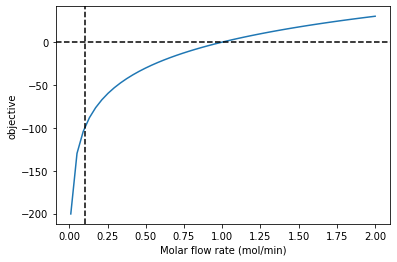

In [1]:
import matplotlib.pyplot as plt

fa = np.linspace(0.01, 2)
obj = [objective(f) for f in fa]
plt.plot(fa, obj)
plt.xlabel('Molar flow rate (mol/min)')
plt.ylabel('objective')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0.1, color='k', linestyle='--')

You can see there is one answer in this range, near a flow rate of 0.1 mol/min. We use that as an initial guess for fsolve:



In [1]:
Fa_guess = 1.0
Fa_exit, = fsolve(objective, Fa_guess)
print(f'The exit flow rate is {Fa_exit:1.4f} mol/min.')

# Out [78]:
# output
The exit flow rate is 1.0026 mol/min.

## Parameterized objective functions



Now, suppose we want to see how our solution varies with a parameter value. For example, we can change the rate constant by changing the temperature. Say we want to compute the exit molar flow rate at a range of rate constants, e.g. from 0.02 to 2 1/min. In other words, we treat the rate constant as a *parameter* and use it in an additional argument.



# Out [79]:
# text/plain
Text(0, 0.5, 'Conversion')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

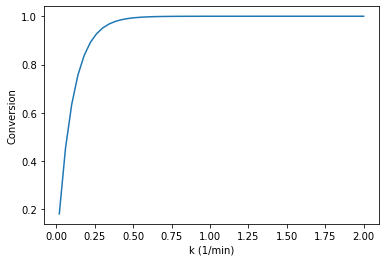

In [1]:
def integrand(Fa, k):
    return -1.0 / (k * Fa / nu)

def objective(Fa, k):
    integral, err = quad(integrand, Fa0, Fa, args=(k,))
    return 100.0 - integral

KRANGE = np.linspace(0.02, 2)

fa_exit = np.zeros(KRANGE.shape)

guess = 0.1

for i, k in enumerate(KRANGE):
    ans, info, status, msg = fsolve(objective, guess, args=(k,), full_output=1)
    if status == 1:
        fa_exit[i] = ans
        guess = ans
    else:
        print(f'k = {k} failed. {msg}')

plt.plot(KRANGE, (Fa0 - fa_exit) / Fa0)
plt.xlabel('k (1/min)')
plt.ylabel('Conversion')

You can see here that any rate constant above about 0.5 1/min leads to near complete conversion, so heating above the temperature required for this would be wasteful.



## Summary



In this lecture we reviewed methods to solve non-linear algebraic equations (they also work on linear algebra, but it is considered wasteful since there are more efficient methods to solve those).

-   The key idea is to create a function that is equal to zero at the solution, and then use `scipy.optimize.fsolve` with an initial guess to find the solution.
-   We introduced *list comprehension* which is a convenient syntax for for loops.
-   We also looked at `scipy.misc.derivative` which is a convenient way to numerically estimate the derivative of a function by finite difference formulas.

Reminders:

-   No class on <span class="timestamp-wrapper"><span class="timestamp">[2019-09-25 Wed]</span></span>
-   First exam is on <span class="timestamp-wrapper"><span class="timestamp">[2019-09-30 Mon]</span></span>

